In [1]:
# Stuff in general
import numpy as np
from skimage import io
from skimage.color import rgb2gray

# My own
from analysePicObj import analysePicObj as apic
from getFileList import getFileList as getList
from calcEmit import calcEmit

# Settings for data
dataPath='data2/'
baseName='scanA-slitImage-'
bkgImage='scanA-slitImage--bkg-1.png'
posList=[0,100,200,300,400,500,600,700,800,900,1000,1100]
numImages=4
slitSep=0.15
L=0.25
convScreen=15e-6

# Other settings
DEBUG=1

bkgImage=rgb2gray(io.imread(dataPath+bkgImage))
bigLoop=0

for numWork in posList:
    if DEBUG:
        print("Working on position " + str(numWork))
        
    # Create the list of images to work on
    workString=baseName+str(numWork)+'_*'
    fileList=getList(dataPath,workString)

    # Loop through, load images and analyse them
    for currentImage in range(0,len(fileList)):

        if (DEBUG and (currentImage % 10 == 0)):
            print("Working on pic " + str(currentImage) + "/" + str(len(fileList)))

        # Load the current image to work with and convert it to gray
        inImage=rgb2gray(io.imread(dataPath+fileList[currentImage]))

        # for now, run image analyser in a try/catch so if there is
        # any disasterous error we just ignore it
        try:
            outPut=apic(bkgImage, inImage, DEBUG)
        except:
            outPut=[0,0,0,0,0,0,0]

        # if first, create dataVect otherwise stack on data
        if currentImage == 0:
            dataVect=outPut
        else:
            dataVect=np.vstack((dataVect,outPut))

    # Data from all images in dataVect so call the calculate emittance func
    emitVect=calcEmit(dataVect, numImages, slitSep, convScreen, L, DEBUG)

    # Store data
    if bigLoop == 0:
        emitStore=emitVect
        fullStore=dataVect
    else:
        emitStore=np.vstack((emitStore,emitVect))
        fullStore=np.vstack((fullStore,dataVect))

    bigLoop=bigLoop+1

Working on position 0
Working on pic 0/172
Working on pic 10/172
Working on pic 20/172
Working on pic 30/172
Working on pic 40/172
Working on pic 50/172
Working on pic 60/172
Working on pic 70/172
Working on pic 80/172
Working on pic 90/172
Working on pic 100/172
Working on pic 110/172
Working on pic 120/172
Working on pic 130/172
Working on pic 140/172
Working on pic 150/172
Working on pic 160/172
Working on pic 170/172
Number of slits included / emittance unnorm / spot size
12 / 1.2952485636023583e-07 / 0.4251289036738864
Working on position 100
Working on pic 0/172
Working on pic 10/172
Working on pic 20/172
Working on pic 30/172
Working on pic 40/172
Working on pic 50/172
Working on pic 60/172
Working on pic 70/172
Working on pic 80/172
Working on pic 90/172
Working on pic 100/172
Working on pic 110/172
Working on pic 120/172
Working on pic 130/172
Working on pic 140/172
Working on pic 150/172
Working on pic 160/172
Working on pic 170/172
Number of slits included / emittance unnorm

C:\Users\joean\Documents\emitCode\analysePicObj.py:84: RuntimeWarning: invalid value encountered in double_scalars
  avCenter=(workVect@workVectX)/totalIntensity
C:\Users\joean\Documents\emitCode\analysePicObj.py:85: RuntimeWarning: invalid value encountered in double_scalars
  avSigma=np.sqrt((workVect@((workVectX-avCenter)**2))/totalIntensity)


Working on pic 170/172
Number of slits included / emittance unnorm / spot size
25 / 2.4675131301670175e-07 / 0.9694798597966725
Working on position 1100
Working on pic 0/172
Working on pic 10/172
Working on pic 20/172
Working on pic 30/172
Working on pic 40/172
Working on pic 50/172
Working on pic 60/172
Working on pic 70/172
Working on pic 80/172
Working on pic 90/172
Working on pic 100/172
Working on pic 110/172
Working on pic 120/172
Working on pic 130/172
Working on pic 140/172
Working on pic 150/172
Working on pic 160/172
Working on pic 170/172
Number of slits included / emittance unnorm / spot size
28 / 2.859520704101506e-07 / 1.099131648505347


25 % 2

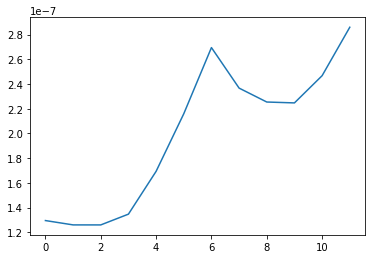

In [14]:
from matplotlib import pyplot as plt
plt.plot(emitStore[:,1])